<a href="https://colab.research.google.com/github/vindhya1103/GenAI/blob/main/GAI_Exp2_Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build an Artificial Neural Network to implement Multi-Class Classification task using the Back-propagation algorithm and test the same using appropriate data sets

### Database
* The data that will be incorporated is the **MNIST database** (Modified National Institute of Standards and Technology database) which contains 60,000 images for training and 10,000 test images.
* The dataset consists of small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9
* The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

In [1]:
pip install matplotlib

In [2]:
from tensorflow import keras
from keras.datasets import mnist     # MNIST dataset is included in Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


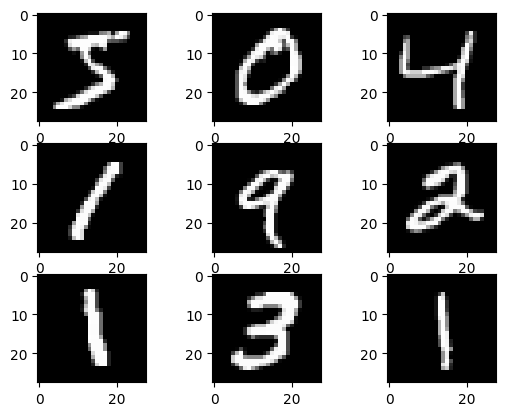

In [3]:
# Plot first few images
import matplotlib.pyplot as plt
for i in range(9):
	# define subplot
	plt.subplot(3,3,i+1) # 3 rows, 3 col, pos
	# plot raw pixel data
	plt.imshow(X_train[i], cmap='gray')
# show the figure
plt.show()

In [4]:
X_train[i].shape

(28, 28)

In [5]:
# Each pixel is an 8-bit integer from 0-255 (0 is full black, 255 is full white)
# single-channel pixel or monochrome image
X_train[i][10:20,10:20]

array([[  0,   0,  20, 254, 254, 108,   0,   0,   0,   0],
       [  0,   0,  16, 239, 254, 143,   0,   0,   0,   0],
       [  0,   0,   0, 178, 254, 143,   0,   0,   0,   0],
       [  0,   0,   0, 178, 254, 143,   0,   0,   0,   0],
       [  0,   0,   0, 178, 254, 162,   0,   0,   0,   0],
       [  0,   0,   0, 178, 254, 240,   0,   0,   0,   0],
       [  0,   0,   0, 113, 254, 240,   0,   0,   0,   0],
       [  0,   0,   0,  83, 254, 245,  31,   0,   0,   0],
       [  0,   0,   0,  79, 254, 246,  38,   0,   0,   0],
       [  0,   0,   0,   0, 214, 254, 150,   0,   0,   0]], dtype=uint8)

### Formatting the input data

* Reshape (or flatten) the 28x28 image into a 784-length vector.


<img src='https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/flatten.png?raw=1' width=50%>

* Input values [0-255] are Normalized in the range [0-1]

A `Min-Max Scaling` is typically done via the following equation:

$$X_{norm} = \frac{X_{i} - X_{min}}{X_{max} - X_{min}}$$

$X_i$ is the $i^{th}$ sample of dataset.

In [6]:
# reshape 28 x 28 matrices into 784-length vectors
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# normalize each value for each pixel for the entire vector for each input
# change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize by dividing by largest pixel value
X_train /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


### DNN for Multi-class classification using Keras library

#### Build the model

helpful url: https://www.analyticsvidhya.com/blog/2021/06/mnist-dataset-prediction-using-keras/

In [9]:
# Sequential keras model with Dense layes (DIY)

from keras.models import Sequential  # Model type to be used
from keras.layers import Dense # Types of layers to be used in our model

mdl = Sequential()
# Input layer with 64 units and relu activation
mdl.add(Dense(64, input_dim=784, activation='relu'))
# Hidden layer with 32 units and relu activation
mdl.add(Dense(32, activation='relu'))
# Output layer with 10 units and softmax activation
mdl.add(Dense(10, activation='softmax'))
# Compile model
mdl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

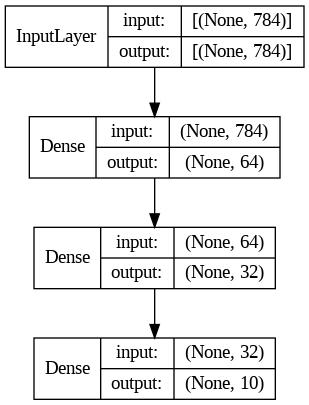

In [11]:
# Visualize the model
from keras.utils import plot_model
plot_model(mdl, show_shapes=True, show_layer_names=False)

In [12]:
# Display model summary
mdl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
#understand model summary
784*64 + 64

50240

In [14]:
64*32 + 32

2080

In [15]:
32*10 + 10

330

#### Convert labels to "one-hot" vectors using the to_categorical function
```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```


In [16]:
from tensorflow.keras.utils import to_categorical
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)
print(y_test[6])
print(y_test1[6,:])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#### Train the model

* If unspecified, by default batch_size=32
* 60,000/64 = 938 minibatches
* Reference: https://keras.io/api/models/model_training_apis/

In [17]:
# Train the model
epochs=10
batch = 64
history = mdl.fit(X_train, y_train1,epochs=epochs, batch_size=batch,verbose=1, validation_data=(X_test, y_test1))

Epoch 1/10
938/938 [==============================] - 6s 5ms/step - loss: 0.3359 - accuracy: 0.9046 - val_loss: 0.1813 - val_accuracy: 0.9469
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1568 - accuracy: 0.9545 - val_loss: 0.1378 - val_accuracy: 0.9598
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1154 - accuracy: 0.9649 - val_loss: 0.1115 - val_accuracy: 0.9663
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0913 - accuracy: 0.9731 - val_loss: 0.1041 - val_accuracy: 0.9699
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0767 - accuracy: 0.9766 - val_loss: 0.0982 - val_accuracy: 0.9699
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0649 - accuracy: 0.9801 - val_loss: 0.0995 - val_accuracy: 0.9708
Epoch 7/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0564 - accuracy: 0.9827 - val_loss: 0.0971 - val_accuracy: 0.9725
Epoch 

# Evaluate Model

### Plot Learning graphs

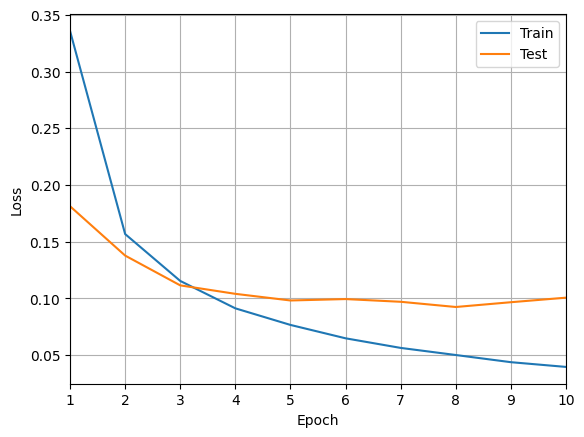

In [18]:
epochRange = range(1,epochs+1);
plt.plot(epochRange,history.history['loss'])
plt.plot(epochRange,history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.xlim((1,epochs))
plt.legend(['Train','Test'])
plt.show()

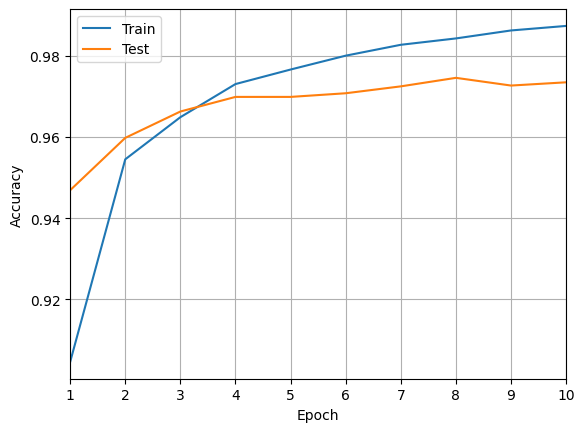

In [19]:
plt.plot(epochRange,history.history['accuracy'])
plt.plot(epochRange,history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.xlim((1,epochs))
plt.legend(['Train','Test'])
plt.show()

#### Performance metrics

In [20]:
import numpy as np
yhat_test_mdl_prob = mdl.predict(X_test);
yhat_test_mdl = np.argmax(yhat_test_mdl_prob,axis=-1)
print(yhat_test_mdl_prob[0])
print(yhat_test_mdl[0:10])
print(y_test[0:10])

313/313 [==============================] - 1s 3ms/step
[2.6536673e-10 1.0935407e-09 1.2760498e-05 7.9920545e-05 2.8847770e-11
 1.0768323e-07 1.6173790e-20 9.9990577e-01 7.0141748e-10 1.3945451e-06]
[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


In [21]:
from sklearn.metrics import accuracy_score
print('Accuracy:')
print(float(accuracy_score(y_test, yhat_test_mdl))*100,'%')

Accuracy:
97.35000000000001 %


In [22]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, yhat_test_mdl))

Confusion Matrix:
[[ 971    1    0    0    1    3    2    1    1    0]
 [   0 1124    6    0    0    1    2    1    1    0]
 [   6    0 1013    3    1    1    1    5    2    0]
 [   0    1   12  974    0    7    0    6    2    8]
 [   1    0    6    0  954    1    4    2    0   14]
 [   2    0    0   17    1  858    6    2    3    3]
 [   8    3    3    1    5    5  933    0    0    0]
 [   1    5    9    2    1    0    0 1004    0    6]
 [   5    0    7    8    8    3    2    5  922   14]
 [   2    3    0    6    6    3    1    5    1  982]]
